In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Loads the image

In [2]:
def read_nifti(file_name, labels = ['X', 'Y', 'Z', 'T']):
    
    img = nib.load(file_name)
    
    return img, img.shape

In [4]:
# open image

file_name = '/Users/vigji/Downloads/2023-06-14_python-course/hungary/sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_pd2dt.nii.gz'

img, [X,Y,Z,T] = read_nifti(file_name)

print(f'Image loaded\nX: {X}, Y: {Y}, Z: {Z}, T:{T}')

Image loaded
X: 128, Y: 1, Z: 91, T:3600


In [6]:
# open mask

mask_name = '/Users/vigji/Downloads/2023-06-14_python-course/hungary/sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_mask.nii.gz'

mask_img, [X,Y,Z] = read_nifti(mask_name)

print(f'Mask loaded\nX: {X}, Y: {Y}, Z: {Z}')

Mask loaded
X: 128, Y: 1, Z: 91


In [24]:
# Checks header

for field in img.header:
    
    print(f'{field:<18} : {img.header[field]}')

sizeof_hdr         : 348
data_type          : b''
db_name            : b''
extents            : 0
session_error      : 0
regular            : b'r'
dim_info           : 0
dim                : [   4  128    1   91 3600    1    1    1]
intent_p1          : 0.0
intent_p2          : 0.0
intent_p3          : 0.0
intent_code        : 0
datatype           : 16
bitpix             : 32
slice_start        : 0
pixdim             : [-1.    0.11  0.4   0.1   0.5   0.    0.    0.  ]
vox_offset         : 0.0
scl_slope          : nan
scl_inter          : nan
slice_end          : 0
slice_code         : 0
xyzt_units         : 10
cal_max            : 267.5986328125
cal_min            : 3.3584582805633545
slice_duration     : 0.0
toffset            : 0.0
glmax              : 0
glmin              : 0
descrip            : b''
aux_file           : b''
qform_code         : 1
sform_code         : 0
quatern_b          : 0.0
quatern_c          : 0.0
quatern_d          : 0.0
qoffset_x          : 0.0
qoffset_y     

In [7]:
# Just the fields of interest

fields_of_interest = ['dim', 'pixdim', 'srow_x', 'srow_y', 'srow_z']

for field in fields_of_interest:
    
    print(f'{field:<18} : {img.header[field]}')

dim                : [   4  128    1   91 3600    1    1    1]
pixdim             : [-1.    0.11  0.4   0.1   0.5   0.    0.    0.  ]
srow_x             : [0. 0. 0. 0.]
srow_y             : [0. 0. 0. 0.]
srow_z             : [0. 0. 0. 0.]


In [8]:
# Check the affine

print(img.affine)

[[ 0.11        0.          0.          0.        ]
 [ 0.          0.40000001  0.          0.        ]
 [ 0.          0.         -0.1         0.        ]
 [ 0.          0.          0.          1.        ]]


In [9]:
# Check the shapes

print(f'image: {img.header["dim"]}\nmask: {mask_img.header["dim"]}')

image: [   4  128    1   91 3600    1    1    1]
mask: [  3 128   1  91   1   1   1   1]


In [10]:
# Compare the affines

print(f'image: \n{img.affine}\nmask: \n{mask_img.affine}')

image: 
[[ 0.11        0.          0.          0.        ]
 [ 0.          0.40000001  0.          0.        ]
 [ 0.          0.         -0.1         0.        ]
 [ 0.          0.          0.          1.        ]]
mask: 
[[ 0.11        0.          0.          0.        ]
 [ 0.          0.40000001  0.          0.        ]
 [ 0.          0.         -0.1         0.        ]
 [ 0.          0.          0.          1.        ]]


# Orientation

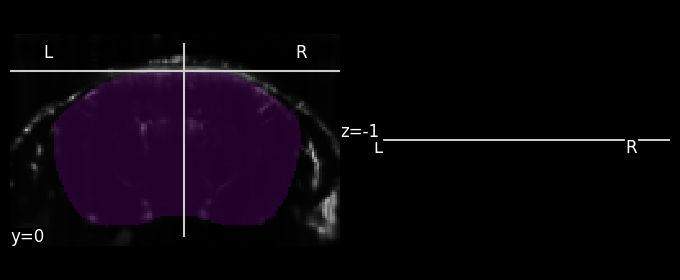

In [14]:
# proper display

from nilearn.plotting import plot_anat
from nilearn.image import mean_img, math_img

display = plot_anat(mean_img(img))
display.add_overlay(mask_img, alpha = 0.5)


In [15]:
# Custom display

# get images to display

img_data = img.get_fdata()
mask_data = mask_img.get_fdata()

with np.errstate(divide = 'ignore', invalid = 'ignore'):
    img_0 = np.log10(img_data.squeeze().mean(2))
img_1 = mask_data.squeeze()

(-0.5, 127.5, 90.5, -0.5)

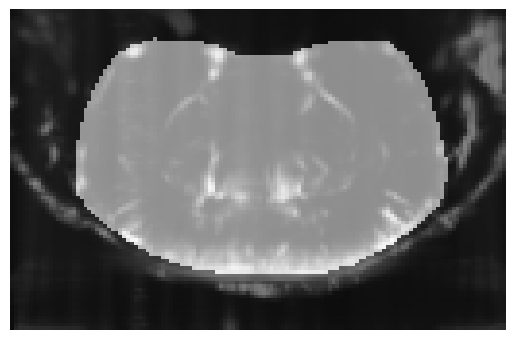

In [17]:
# Displays with matplotlib

plt.imshow(np.rot90(img_0), cmap = 'Greys_r', aspect = 0.1/0.11, vmin = 0.6)
plt.imshow(np.rot90(img_1), cmap = 'Greys_r', alpha = 0.5, aspect = 0.1/0.11)

plt.axis('off')

(-0.5, 127.5, 90.5, -0.5)

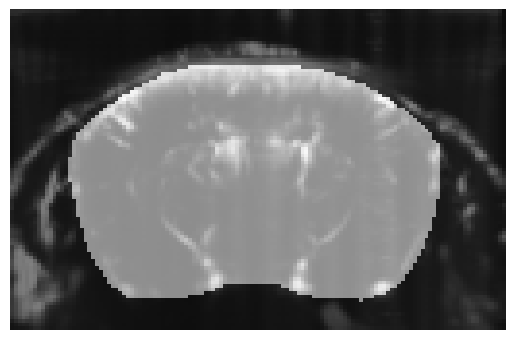

In [18]:
# Is rotating the solution

plt.imshow(np.rot90(img_0,3), cmap = 'Greys_r', aspect = 0.1/0.11, vmin = 0.6)
plt.imshow(np.rot90(img_1,3), cmap = 'Greys_r', alpha = 0.5, aspect = 0.1/0.11)

plt.axis('off')

(-0.5, 127.5, 90.5, -0.5)

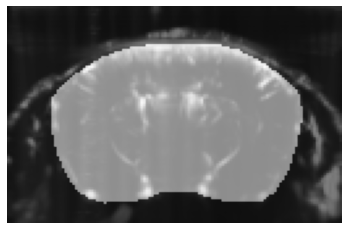

In [15]:
# It is different from a flip

plt.imshow(np.rot90(np.flip(img_0,1)), cmap = 'Greys_r', aspect = 0.1/0.11, vmin = 0.6)
plt.imshow(np.rot90(np.flip(img_1,1)), cmap = 'Greys_r', alpha = 0.5, aspect = 0.1/0.11)

plt.axis('off')

In [25]:
# Never mess with the affine

affine = mask_img.affine
affine[2,2] = 0.1
flipped_mask = nib.Nifti1Image(
    mask_img.get_fdata(), 
    affine = affine, 
    header = mask_img.header
)

flipped_mask.affine

array([[ 0.11      ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.40000001,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.1       , -9.1       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

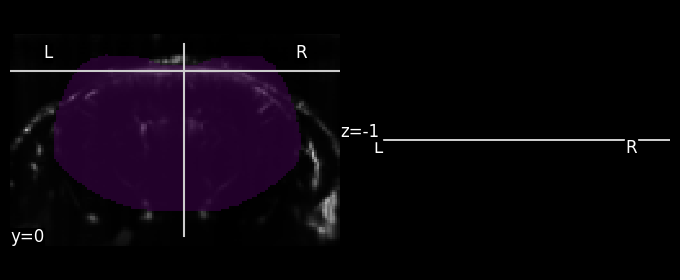

In [26]:
# Changing the affine is changing the world representation

display = plot_anat(mean_img(img))
display.add_overlay(flipped_mask, alpha = 0.5)

In [27]:
# Modifying the affine requires geometrical processing

affine = mask_img.affine
affine[2,2] = 0.1
affine[2,3] = -Z*0.1
flipped_mask = nib.Nifti1Image(
    mask_img.get_fdata(), 
    affine = affine, 
    header = mask_img.header
)

flipped_mask.affine

array([[ 0.11      ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.40000001,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.1       , -9.1       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

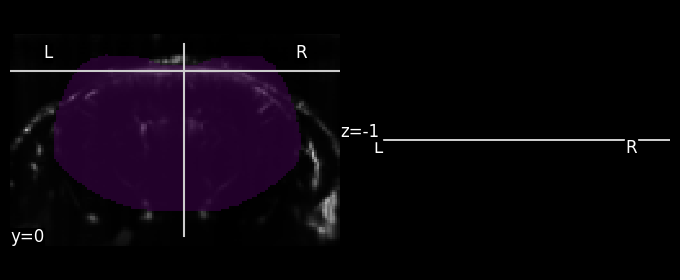

In [28]:
display = plot_anat(mean_img(img))
display.add_overlay(flipped_mask, alpha = 0.5)

In [29]:
# Practicals 2.3.0

# Correlation analysis

In [32]:
# open image

file_name = '/Users/vigji/Downloads/2023-06-14_python-course/hungary/sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_pd2dt.nii.gz'
mask_name = '/Users/vigji/Downloads/2023-06-14_python-course/hungary/sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_mask.nii.gz'

img, [X,Y,Z,T] = read_nifti(file_name)

print(f'Image loaded\nX: {X}, Y: {Y}, Z: {Z}, T:{T}')

mask_img, [X,Y,Z] = read_nifti(mask_name)

print(f'Mask loaded\nX: {X}, Y: {Y}, Z: {Z}')

Image loaded
X: 128, Y: 1, Z: 91, T:3600
Mask loaded
X: 128, Y: 1, Z: 91


/Users/vigji/miniconda3/envs/course_env/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:1426: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  data = clean(data, t_r=t_r, detrend=True, standardize='zscore')


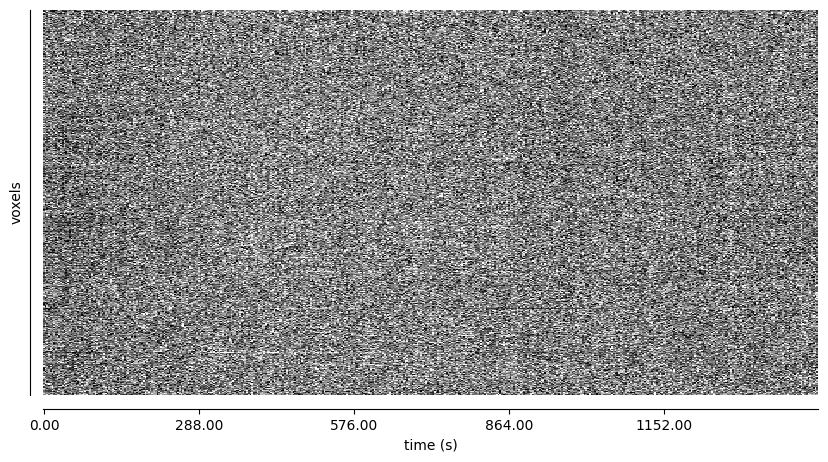

In [33]:
# Display proper

from nilearn.plotting import plot_carpet

_ = plot_carpet(img, mask_img = mask_img, t_r = 0.4)

In [34]:
# Custom display

from nilearn.masking import apply_mask, unmask

signals = apply_mask(img, mask_img)

print(signals.shape)

(3600, 5340)


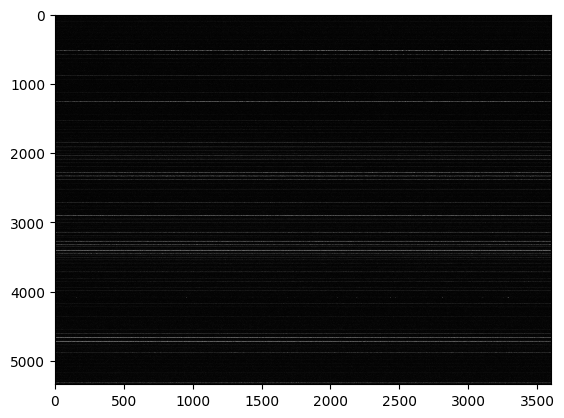

In [35]:
# Weird

plt.imshow(np.rot90(signals), interpolation = 'none', cmap = 'Greys_r', aspect = 'auto')

In [36]:
# Normalise

signals_norm = (signals-signals.mean(0))/signals.std(0)

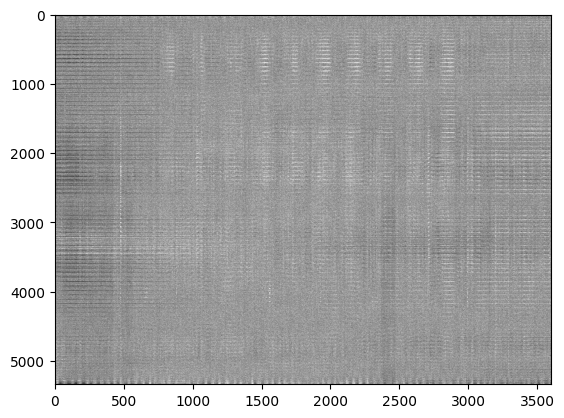

In [37]:
# smooth custom

plt.imshow(
    np.rot90(signals_norm), 
    cmap = 'Greys_r', 
    aspect = 'auto', 
    vmin = -2, 
    vmax = 2
)

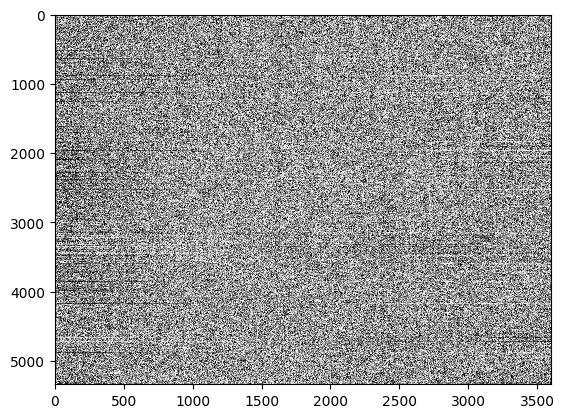

In [39]:
# Proper is not always that proper

plt.imshow(
    np.rot90(signals_norm), 
    cmap = 'Greys_r', 
    aspect = 'auto', 
    interpolation = 'none',
    vmin = -2, 
    vmax = 2
)

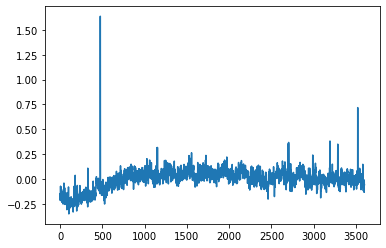

In [42]:
# Looking at global signal

plt.plot(signals_norm.mean(1))

In [40]:
# proper detrend

from scipy.signal import detrend

signals_detrend = detrend(signals_norm, type = 'linear', axis = 0)

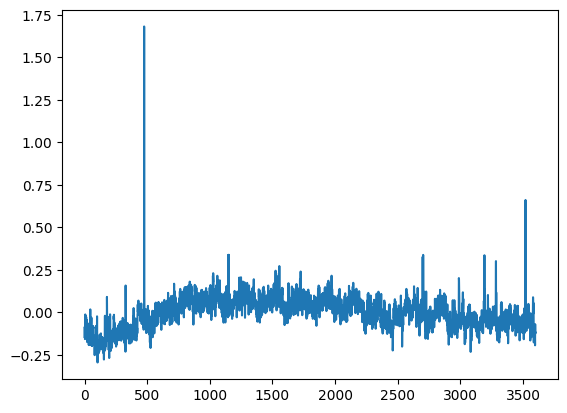

In [41]:
# not so proper

plt.plot(signals_detrend.mean(1))

In [49]:
# Custom detrend

def detrend_poly(signals, deg = 3, norm=True):
    
    [T,nb_vox] = signals.shape
    if norm:
        x = np.linspace(-1, 1, T)
    else:
        x = np.arange(T)
    p = np.polyfit(x, signals, deg)
    # poly_fit = np.array([np.polyval(p_i, x) for p_i in p.T]).T
    
    return p# signals-poly_fit


detrend_poly(signals_norm)

array([[ 0.41812791,  0.8861809 ,  0.76471421, ...,  0.12977923,
         0.24539548,  0.35347726],
       [-0.1073515 , -0.31212024, -0.30398589, ..., -0.20965527,
        -0.54072077, -0.58824574],
       [-0.55055654, -0.91146751, -0.80562912, ..., -0.13639999,
        -0.50675152, -0.52281482],
       [ 0.03580374,  0.10409777,  0.10138495, ...,  0.069924  ,
         0.18034048,  0.19619118]])

In [ ]:
detrend_poly(signals_norm, norm=False)

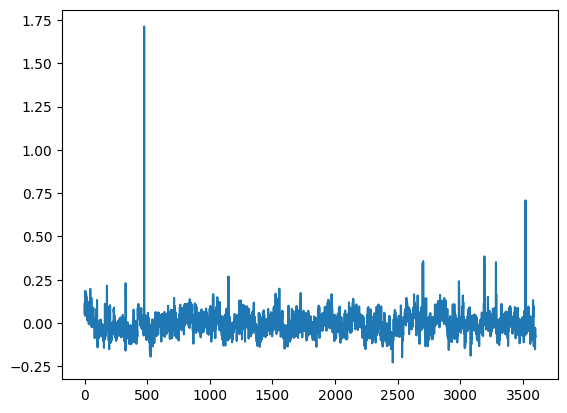

In [46]:
# detrended signal

plt.plot(signals_detrend.mean(1))

In [50]:
# Lets go back to images

img_norm = unmask(signals_norm, mask_img)
img_detrend = unmask(signals_detrend, mask_img)

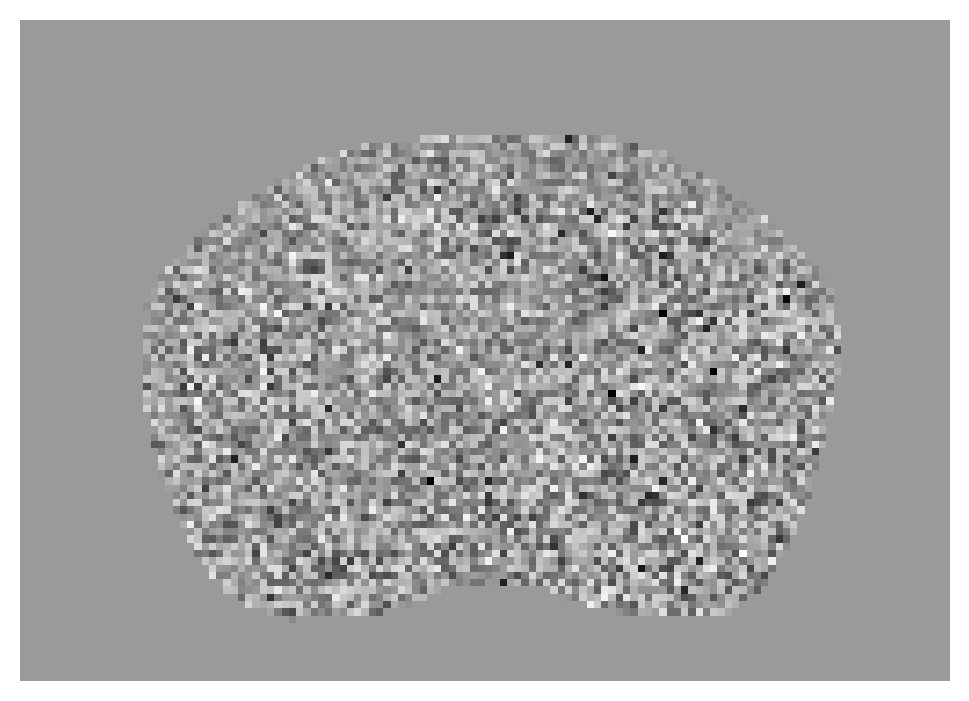

In [51]:
# Custom display

def display_fus_img(img, fig = None, ax = None):
    
    if not fig:
        
        fig = plt.figure(figsize = (6,5), dpi = 200)
        
    if not ax:
        
        ax = fig.gca()        
    
    img_0 = np.flip(img.get_fdata().squeeze().mean(2), 1)
        
    ax.imshow(np.rot90(img_0), cmap = 'Greys_r')
    ax.axis('off')
    
    return fig, ax
    
# Normalised

_ = display_fus_img(img_norm)

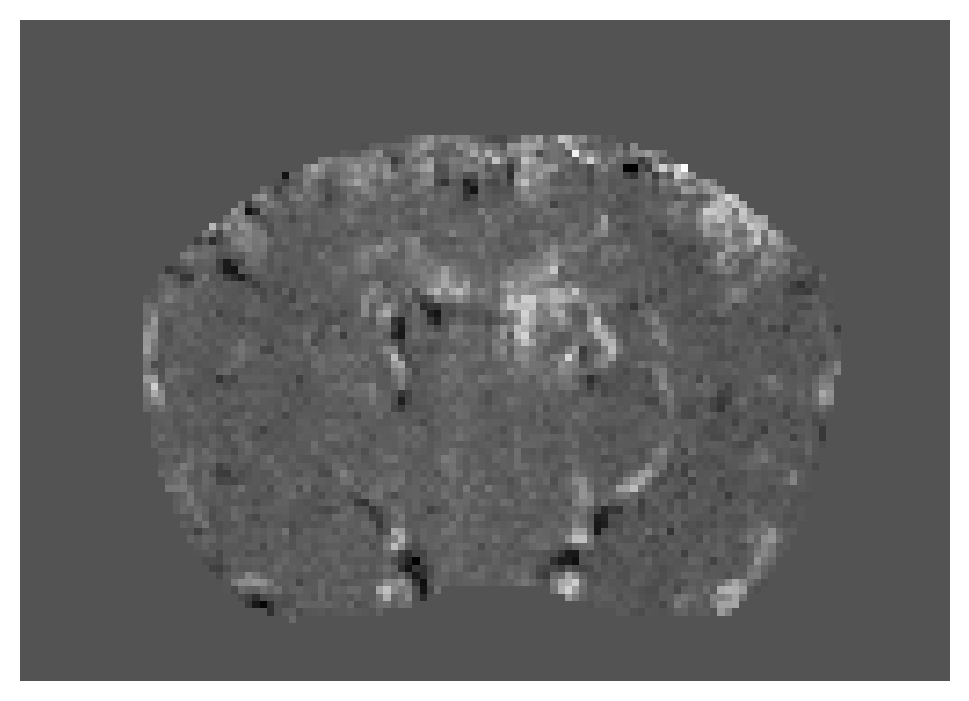

In [52]:
# Detrended

_ = display_fus_img(img_detrend)

In [53]:
# Lindquist 2018

# Getting the stim

In [55]:
# Reading events file

from pandas import read_csv

fs = 2.5

csv_name = file_name = '/Users/vigji/Downloads/2023-06-14_python-course/hungary/sub-Kremes/ses-CtrlH/func/sub-Kremes_ses-CtrlH_task-stim_run-01_events.tsv'

events = read_csv(csv_name, delimiter = '\t')
events

,onset,duration,trial_type
0,0,300.0,rest
1,300,30.0,active
2,330,60.0,rest
3,390,30.0,active
4,420,60.0,rest
5,480,30.0,active
6,510,60.0,rest
7,570,30.0,active
8,600,60.0,rest
9,660,30.0,active


In [56]:
# Building event regressor

event_signal = np.zeros(T)
for row in events.iterrows():
    
    if row[1].trial_type == 'active':

        event_signal[int(row[1].onset*fs):int(row[1].onset*fs)+int(row[1].duration*fs)] = 1

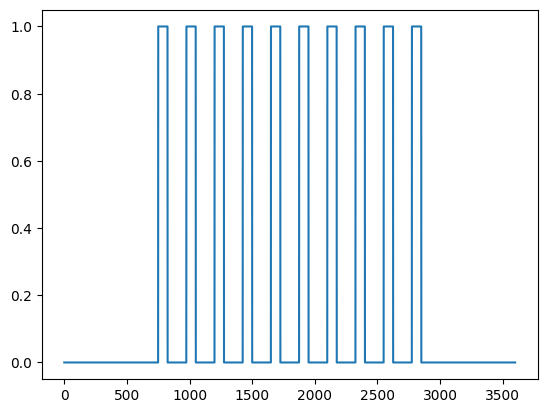

In [57]:
# plotting the stim

plt.plot(event_signal)

# Correlation map

In [58]:
# Computes correlation

cor_raw = [np.corrcoef(x, event_signal)[0,1] for x in signals.T]
cor_detrend = [np.corrcoef(x, event_signal)[0,1] for x in signals_detrend.T]

In [59]:
# Goes to images

amap_raw = unmask(cor_raw, mask_img).get_fdata().squeeze()
amap_detrend = unmask(cor_detrend, mask_img).get_fdata().squeeze()

(-0.5, 127.5, 90.5, -0.5)

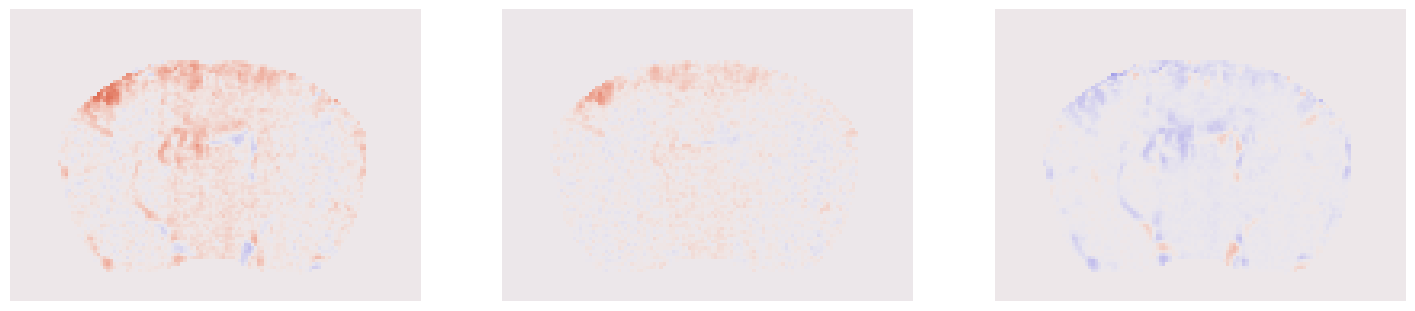

In [61]:
# Fancy display => Colorcet is life 

import colorcet as cc

nb_col = 3
nb_lin = 1

fig, ax = plt.subplots(nb_lin, nb_col, figsize = (nb_col*6, nb_lin*5))

ax[0].imshow(np.rot90(amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[0].axis('off')

ax[1].imshow(np.rot90(amap_detrend,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[1].axis('off')

ax[2].imshow(np.rot90(amap_detrend-amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[2].axis('off')

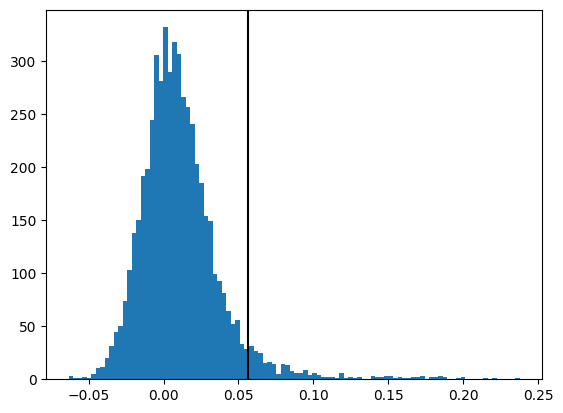

In [62]:
# A bit of stats

_ = plt.hist(cor_detrend, 100)

plt.axvline(np.percentile(cor_detrend, 95), c = 'k')

In [63]:
# Lets get an active zone

mask_active = np.zeros(len(cor_detrend))
mask_active[np.array(cor_detrend) > np.percentile(cor_detrend, 98)] = 1

img_mask_active = unmask(mask_active, mask_img)

(-0.5, 127.5, 90.5, -0.5)

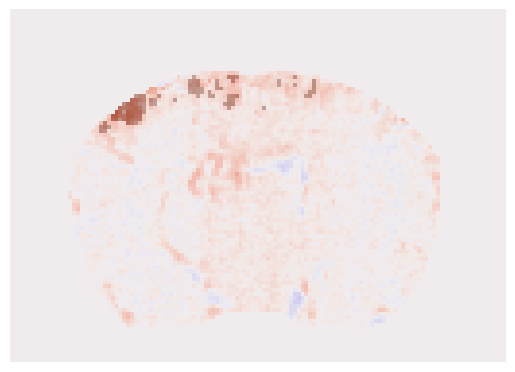

In [64]:
# What does the zone look like

plt.imshow(np.rot90(amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)

img_1 = img_mask_active.get_fdata().squeeze()

plt.imshow(np.rot90(img_1,3), cmap = 'Greys', alpha = 0.2)
plt.axis('off')

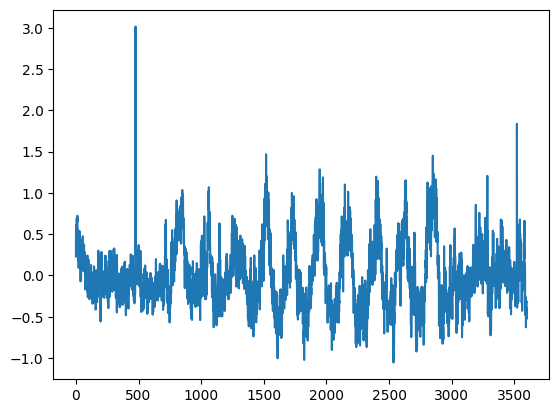

In [65]:
# some timeseries

active_signals = apply_mask(img_detrend, img_mask_active)

plt.plot(active_signals.mean(1))

In [ ]:
# Practicals 2.3.1

# Clean image

In [68]:
# all at once

from nilearn.image import clean_img, smooth_img, high_variance_confounds

# confounds = high_variance_confounds(img, n_confounds=5, percentile=2.0, detrend=True, mask_img=mask_img)

img_cleaned = clean_img(
    smooth_img(img, fwhm=0.2), 
    mask_img = mask_img, 
    standardize = True,
    detrend = True,
    high_pass = 0.01,
    t_r = 1/fs
)

signals_clean = apply_mask(img_cleaned, mask_img)
cor_clean = [np.corrcoef(x, event_signal)[0,1] for x in signals_clean.T]
amap_clean = unmask(cor_clean, mask_img).get_fdata().squeeze()

/Users/vigji/miniconda3/envs/course_env/lib/python3.9/site-packages/nilearn/image/image.py:1271: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  data = signal.clean(


(-0.5, 127.5, 90.5, -0.5)

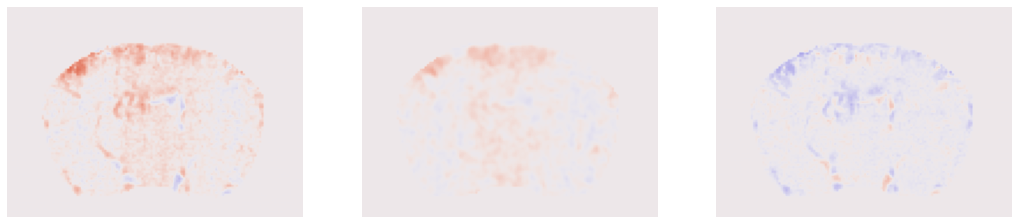

In [96]:
# might be slightly over processed

import colorcet as cc

nb_col = 3
nb_lin = 1

fig, ax = plt.subplots(nb_lin, nb_col, figsize = (nb_col*6, nb_lin*5))

ax[0].imshow(np.rot90(amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[0].axis('off')

ax[1].imshow(np.rot90(amap_clean,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[1].axis('off')

ax[2].imshow(np.rot90(amap_clean-amap_raw,3), cmap = cc.cm['CET_D1'], vmin = -0.5, vmax = 0.5)
ax[2].axis('off')

# GLM

Adapted from nilearn tutorials

In [66]:
# Load data

from nilearn.datasets import fetch_spm_auditory

subject_data = fetch_spm_auditory()
subject_data.func 


Dataset created in /Users/vigji/nilearn_data/spm_auditory

Data absent, downloading...


Downloaded 31678464 of 34212021 bytes (92.6%,    0.5s remaining) ...done. (7 seconds, 0 min)
Extracting data from /Users/vigji/nilearn_data/spm_auditory/sub001/MoAEpilot.zip..... done.


['/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_004.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_005.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_006.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_007.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_008.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_009.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_010.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_011.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_012.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_013.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_014.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_015.img',
 '/Users/vigji/nilearn_data/spm_auditory/sub001/fM00223/fM00223_016.img',
 '/Users/vigji/nilearn_data/spm_audito

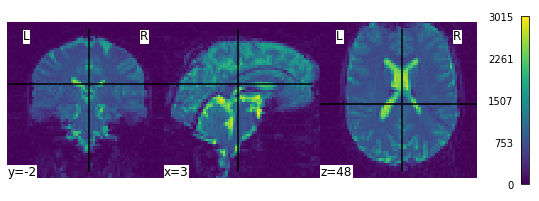

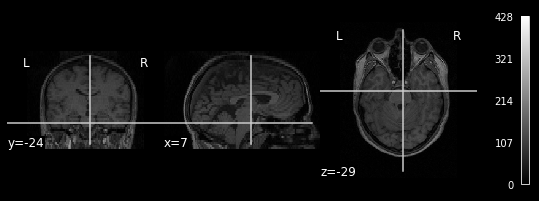

In [98]:
# Display

from nilearn.plotting import plot_anat, plot_img, plot_stat_map

plot_img(subject_data.func[0], colorbar=True, cbar_tick_format="%i")
plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

In [99]:
# Builds stim pattern

from nilearn.image import concat_imgs, mean_img
import pandas as pd

# Creates 4D image

fmri_img = concat_imgs(subject_data.func)
mean_img = mean_img(fmri_img)

# extracts stimulation pattern

events = pd.read_table(subject_data["events"])
events

,onset,duration,trial_type
0,0.0,42.0,rest
1,42.0,42.0,active
2,84.0,42.0,rest
3,126.0,42.0,active
4,168.0,42.0,rest
5,210.0,42.0,active
6,252.0,42.0,rest
7,294.0,42.0,active
8,336.0,42.0,rest
9,378.0,42.0,active


In [103]:
# creates and fit the model

from nilearn.glm.first_level import FirstLevelModel

fmri_glm = FirstLevelModel(
    t_r=7,
    noise_model="ar1",
    standardize=False,
    hrf_model="spm",
    drift_model="cosine",
    high_pass=0.01,
)

fmri_glm = fmri_glm.fit(fmri_img, events)

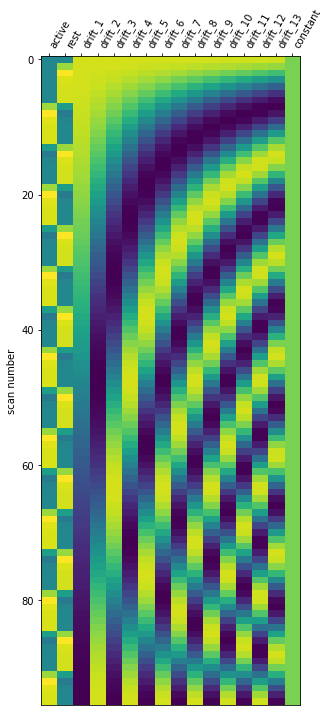

In [106]:
# Checking the model

from nilearn.plotting import plot_design_matrix

design_matrix = fmri_glm.design_matrices_[0]

plot_design_matrix(design_matrix)

plt.show()

In [107]:
# does the stats

import numpy as np

conditions = {"active": np.zeros(16), "rest": np.zeros(16)}
conditions["active"][0] = 1
conditions["rest"][1] = 1

active_minus_rest = conditions["active"] - conditions["rest"]

eff_map = fmri_glm.compute_contrast(
    active_minus_rest, output_type="effect_size"
)

z_map = fmri_glm.compute_contrast(active_minus_rest, output_type="z_score")

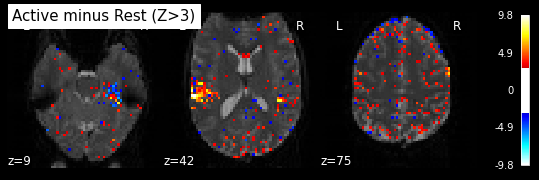

In [108]:
# plots the stats

plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=3.0,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (Z>3)",
)
plt.show()

In [ ]:
# Practicals 2.3.2